In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,SGDClassifier
import sklearn.metrics
from sklearn.metrics import  confusion_matrix, plot_confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [6]:
features = df.columns[0:-1]
df_x = df[features]
df_y = df.target

In [7]:
X = np.array(df_x)
y = np.array(df_y)

x_1 = X[:,7]
x_2 = X[:,9]

#plt.scatter(x_1[y==1], x_2[y==1], color='r', marker='o')    
#plt.scatter(x_1[y==0], x_2[y==0], color='b', marker='o')
#plt.legend(['y = 1','y = 0'])


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 3)  

#  1. Using Logistic Regression without regularization:

In [9]:

def model_classification(X_train,y_train,X_test,y_test,iterations ):
    lr_model = LogisticRegression(penalty='none',max_iter=iterations)
    lr_model.fit(X_train,y_train)
    preds = lr_model.predict(X_test)
    pred_train = lr_model.predict(X_train)
    precision = sklearn.metrics.precision_score(y_test,preds)
    recall = sklearn.metrics.recall_score(y_test,preds)
    f1_score = sklearn.metrics.f1_score(y_test,preds)
    print(plot_confusion_matrix(lr_model, X_test, y_test))
    print(f'Confusion matrix : {confusion_matrix(y_test,preds)}\n Training accuracy : {round(accuracy_score(y_train,pred_train),3)} \nTest accuracy score is {round(accuracy_score(y_test,preds),3)}\n f1_score is {round(f1_score,3)} \n Precision is {round(precision,3)}\n Recall is {round(recall,3)}')

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion matrix : [[27 11]
 [ 2 51]]
 Training accuracy : 0.844 
Test accuracy score is 0.857
 f1_score is 0.887 
 Precision is 0.823
 Recall is 0.962


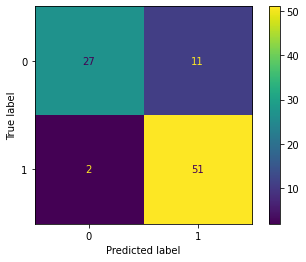

In [10]:
# model defined for  iterations =150
model_classification(X_train,y_train,X_test,y_test,150)

# 2. Tweaking the parameters:

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

The max accuracy achieved is 0.8791208791208791


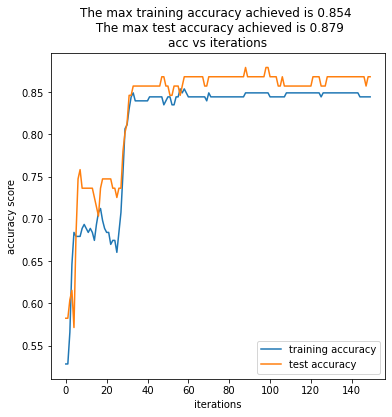

In [11]:
# To get optimal no.of iterations
%matplotlib inline
plt.figure(figsize=(6,6))
acc = []
acc_train = []
iterations = range(150)
for itera in iterations:
    lr = LogisticRegression(penalty='none',max_iter=itera)
    lr.fit(X_train,y_train)
    preds = lr.predict(X_test)
    preds_train = lr.predict(X_train)
    acc.append(accuracy_score(y_test,preds))
    acc_train.append(accuracy_score(y_train,preds_train))
print(f'The max accuracy achieved is {max(acc)}')
plt.plot(iterations,acc_train)
plt.plot(iterations,acc)
plt.legend(['training accuracy','test accuracy'])
plt.xlabel("iterations")
plt.ylabel("accuracy score")
plt.title(f'The max training accuracy achieved is {round(max(acc_train),3)} \n The max test accuracy achieved is {round(max(acc),3)}\nacc vs iterations')
plt.savefig('acc_vs_iter.png')

Confusion matrix : [[28 10]
 [ 2 51]]
 Training accuracy : 0.844 
Test accuracy score is 0.868
 f1_score is 0.895 
 Precision is 0.836
 Recall is 0.962


G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


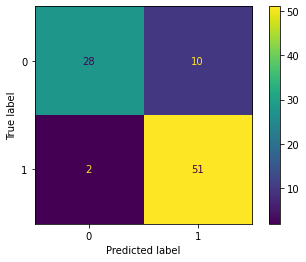

In [12]:
# model defined for  iterations =75
model_classification(X_train,y_train,X_test,y_test,75)

In [13]:
lr_model = LogisticRegression(penalty='none',max_iter=75)
lr_model.fit(X_train,y_train)
preds = lr_model.predict(X_test)
lr_probs = lr_model.predict_proba(X_test)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The precision is 0.836 
The recall is 0.962 
The f1_score is 0.895


Text(0.5, 1.0, 'ROC curve \n AUC = 0.917')

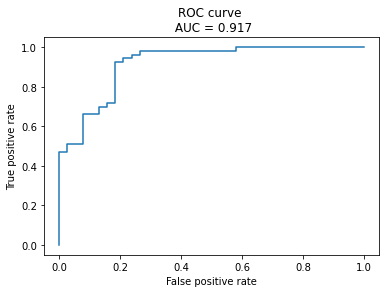

In [14]:
print(f'The precision is {round(sklearn.metrics.precision_score(y_test,preds),3)} \nThe recall is {round(sklearn.metrics.recall_score(y_test,preds),3)} \nThe f1_score is {round(sklearn.metrics.f1_score(y_test,preds),3)}')

fpr,tpr,thresholds = roc_curve(y_test,lr_probs[:,1])
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'ROC curve \n AUC = {round(sklearn.metrics.auc(fpr,tpr),ndigits=3)}')


The max accuracy achieved is 0.879 at threshold 0.56


Text(0.5, 1.0, 'Accuracy vs Threshold values\n Max test accuracy achieved is 0.879 at threshold 0.56')

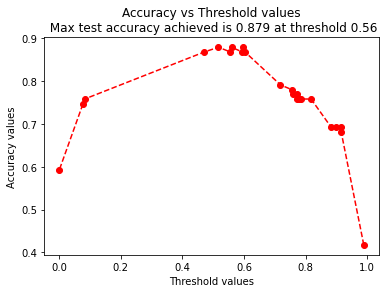

In [15]:
accuracy_scr = {}
#thresholds = np.append(thresholds,0.507)
for thresh in thresholds:
    if thresh < 1:
        y_pred = np.where(lr_probs[:,1] > thresh, 1 ,0)
        accuracy_scr[thresh] = accuracy_score(y_test,y_pred,normalize=True)
        #plt.plot(thresh,accuracy_scr[thresh])
thresh_with_acc = pd.Series(accuracy_scr).sort_values()
#print(accuracy_scr[round(thresh_with_acc,1)])
print(f'The max accuracy achieved is {round(thresh_with_acc.iloc[-1],3)} at threshold {round(thresh_with_acc.idxmax(),3)}')
plt.plot(thresholds[1:],list(accuracy_scr.values()),'ro--')
plt.xlabel('Threshold values')
plt.ylabel('Accuracy values')
plt.title(f'Accuracy vs Threshold values\n Max test accuracy achieved is {round(thresh_with_acc.iloc[-1],3)} at threshold {round(thresh_with_acc.idxmax(),3)}')

# 3. Using Logistic Regression with regularization:

In [16]:


def model_classification_regularised(X_train,y_train,X_test,y_test,regLambda):
    c = 1/regLambda
    lr_model = LogisticRegression(penalty='l2',C=c,max_iter=75) 
    lr_model.fit(X_train, y_train)
    preds = lr_model.predict(X_test)
    lr_probs = lr_model.predict_proba(X_test)
    pred_train = lr_model.predict(X_train)
    accuracy_score(y_train,pred_train)
    print(plot_confusion_matrix(lr_model, X_test, y_test))
    
    precision = sklearn.metrics.precision_score(y_test,preds)
    recall = sklearn.metrics.recall_score(y_test,preds)
    f1_score = sklearn.metrics.f1_score(y_test,preds)
    print(f'For lambda = {1/c} : \n Confusion matrix : {confusion_matrix(y_test,preds)}\n training accuracy :{round(accuracy_score(y_train,pred_train),3)} \ntest accuracy : {round(accuracy_score(y_test,preds),3)}\n f1_score is {round(f1_score,3)} \n Precision is {round(precision,3)}\n Recall is {round(recall,3)}')

    fpr,tpr,thresholds = roc_curve(y_test,lr_probs[:,1])
    accuracy_scr = {}
    for thresh in thresholds:
        y_pred = np.where(lr_probs[:,1] > thresh, 1 ,0)
        accuracy_scr[thresh] = accuracy_score(y_test,y_pred,normalize=True)
    thresh_with_acc = pd.Series(accuracy_scr).sort_values()
    print(f'The max accuracy achieved is {round(thresh_with_acc.iloc[-1],3)} at threshold {round(thresh_with_acc.idxmax(),3)}')
    plt.figure()
    plt.plot(fpr,tpr,label='Lambda = '+str(1/c)+'& AUC ='+str(round(sklearn.metrics.auc(fpr,tpr),ndigits=3)))
    plt.legend()
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(f'ROC curve')

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For lambda = 0.001 : 
 Confusion matrix : [[29  9]
 [ 2 51]]
 training accuracy :0.854 
test accuracy : 0.879
 f1_score is 0.903 
 Precision is 0.85
 Recall is 0.962
The max accuracy achieved is 0.879 at threshold 0.595


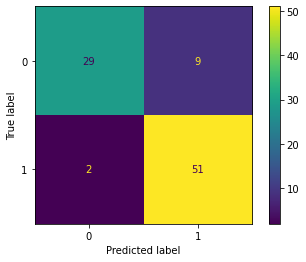

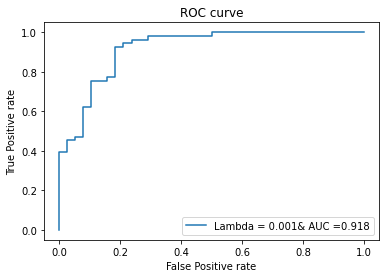

In [17]:
regLambda = 0.001    
model_classification_regularised(X_train,y_train,X_test,y_test,regLambda)

# 4. Logistic Regression with different lambda values:

In [18]:
def plot_model_classification_regularised(X_train,y_train,X_test,y_test,regLambda):
    c = 1/regLambda
    lr_model = LogisticRegression(penalty='l2',C=c,max_iter=75) 
    lr_model.fit(X_train, y_train)
    preds = lr_model.predict(X_test)
    lr_probs = lr_model.predict_proba(X_test)
    pred_train = lr_model.predict(X_train)
    fpr,tpr,thresholds = roc_curve(y_test,lr_probs[:,1])
    
    plt.plot(fpr,tpr,label='Lambda = '+str(1/c)+'& AUC ='+str(round(sklearn.metrics.auc(fpr,tpr),ndigits=3)))
    plt.legend()
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(f'ROC curve')

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

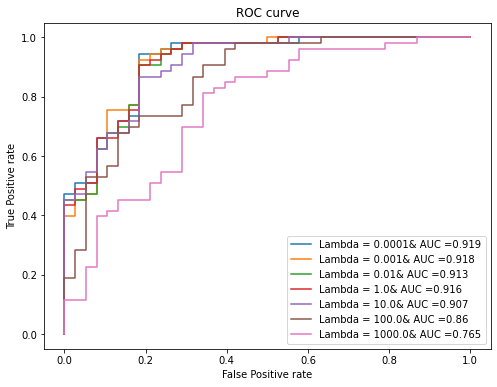

In [19]:
plt.figure(figsize = (8,6))    
for regLamda in [0.0001,0.001,0.01,1,10,100,1000]:
    plot_model_classification_regularised(X_train,y_train,X_test,y_test,regLamda)
    


# 5. Plotting the decision boundary for different lambda values:

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Text(0.5, 1.0, 'Plotting two significant features')

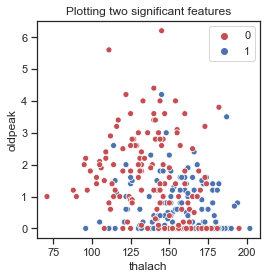

In [21]:
f_1 = 7 # (7+1) Column of df is selected
f_2 = 9
x_1 = X[:,f_1]
x_2 = X[:,f_2]
plt.figure(figsize=(4,4))
sns.set(style="ticks", color_codes=True)
sns.scatterplot(x_1,x_2,palette = ('r', 'b'),hue = y)
plt.xlabel('thalach')
plt.ylabel('oldpeak')
plt.title('Plotting two significant features')

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

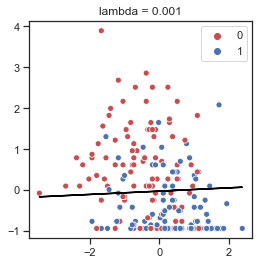

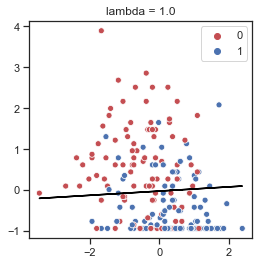

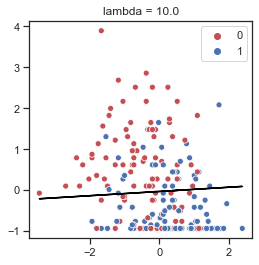

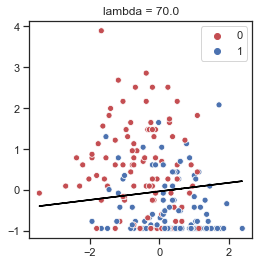

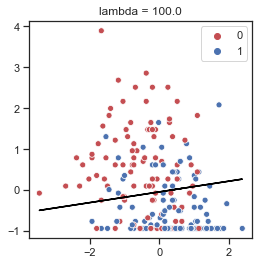

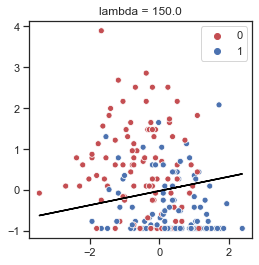

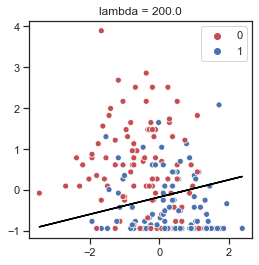

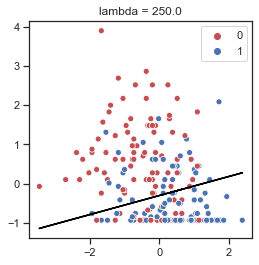

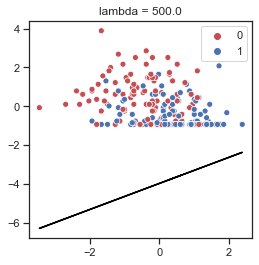

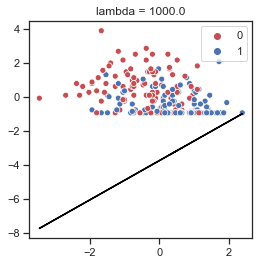

In [23]:
regLamda = [0.001,1,10,70,100,150,200,250,500,1000]

for lamda in regLamda:
    c = 1/lamda
    lr_model = LogisticRegression(penalty='l2',C=c,max_iter=75) # C = 1/lambda
    lr_model.fit(X_train, y_train)
    
    f_1 = 7 # (7+1) Column of df is selected
    f_2 = 9
    x_1 = X_train[:,f_1]
    x_2 = X_train[:,f_2]
    x_1 = (x_1 - x_1.mean())/x_1.std()
    x_2 = (x_2 - x_2.mean())/x_2.std()
    plt.figure(figsize=(4,4))
    sns.set(style="ticks", color_codes=True)
    sns.scatterplot(x_1,x_2,palette = ('r', 'b'),hue = y_train)
    w_1=lr_model.coef_[0,f_1]
    w_2=lr_model.coef_[0,f_2]
    b = lr_model.intercept_

    plt.plot(x_1,-(w_1/w_2)*x_1+b,'black')
    plt.title(f'lambda = {1/c}')
    
